<a href="https://colab.research.google.com/github/cepnur/Citra/blob/main/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os

datagambar = './datagambar/'
save_to = './datagambar/'
target_size = (224, 224)
batch_size = 32

# Buat direktori untuk menyimpan gambar yang telah di-augmentasi
os.makedirs(save_to, exist_ok=True)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
!mkdir -p /datagambar/bipinnatifidum/ /datagambar/xanadu/ /datagambar/oxycardium/ /datagambar/oxycardiumbrazil/

In [38]:
datagambar = './datagambar/'

In [35]:
save_to = './datagambar/'
target_size = (224,224)
batch_size = 32

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.4, 0.99),
    validation_split=0.2,  # Pisahkan 20% data untuk validasi
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [42]:
train_generator = train_datagen.flow_from_directory(
    datagambar,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    save_to_dir=save_to  # Simpan gambar augmentasi di direktori ini
)

validation_generator = train_datagen.flow_from_directory(
    datagambar,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [43]:
!rm datagambar/*.png -rf

In [44]:
for i in range(0,100):
  x,y = next(train_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=valdation_generator.sample // batch_size)

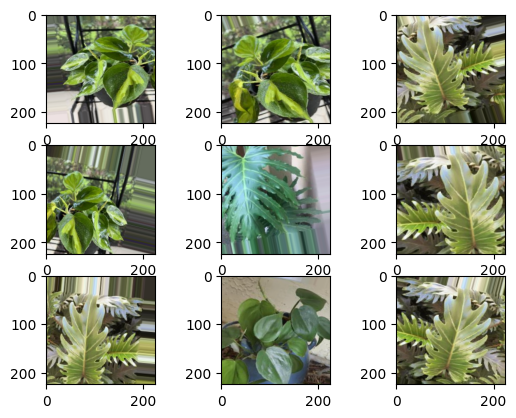

In [51]:
import matplotlib.pyplot as plt
import glob
from keras.preprocessing.image import load_img, img_to_array
glob = glob.glob('datagambar/*.png')

#fig,ax = plt.subplots(nrows=3,ncols=3)
a = 0
for x in range(0,3):
  for y in range(0,3):
    a += 1
    plt.subplot(int('33'+str(a)))
    plt.imshow(load_img(glob[a]))
plt.show()